1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)
2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns
#from surprise import SVD

ModuleNotFoundError: No module named 'surprise'

In [13]:
df = pd.read_csv('ratings_Electronics.csv', header=None, names = ['user','product', 'rating'], usecols = [0,1,2])

In [14]:
df.head()

,user,product,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [15]:
df.shape

(7824482, 3)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
user       object
product    object
rating     float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [18]:
df.describe()

,rating
count,7.824482e+06
mean,4.012337e+00
std,1.380910e+00
min,1.000000e+00
25%,3.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016C4CDBEAC8>]],
      dtype=object)

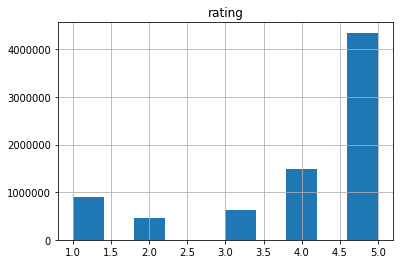

In [20]:
df.hist()

In [22]:
df.isnull().sum()

user       0
product    0
rating     0
dtype: int64

There are no null values in the dataset for any dataset. 
Rating feature is highly unbalanced. 

2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [24]:
df_cnt = df["user"].value_counts()

In [28]:
df1 = df[df["user"].isin(df_cnt[df_cnt >=50].index)]

In [29]:
df1.shape

(125871, 3)

3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [35]:
train_data, test_data = train_test_split(df1, test_size = 0.30, random_state=0)

In [37]:
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (88109, 3)
Test Data Shape:  (37762, 3)


In [ ]:
pr = Recommender.Popularity_Recommender()
pr.create(train_data, 'user_id', 'song')

In [38]:
import Recommender

ModuleNotFoundError: No module named 'Recommender'

In [39]:
pip install -Recommender


The following command must be run outside of the IPython shell:

    $ pip install -Recommender

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [32]:
#finding products with high number of ratings: 
df1.groupby('product')['rating'].count().sort_values(ascending=False).head()

product
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: rating, dtype: int64

In [33]:
#finding products with high Average rating
df1.groupby('product')['rating'].mean().sort_values(ascending=False).head()

product
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: rating, dtype: float64